In [1]:
import sys
sys.path.append('../')

from detect_credits.dataset import Dataset
from detect_credits.detect import SequenceFinder

from utils import load_episodes
from utils import show_frames

In [7]:
def show_result(path):
    
    data = Dataset(path)
    seq = SequenceFinder()
    
    intros = seq.find(data.episodes, data.fps)
    print(intros)
    
    episodes = load_episodes(path)
    for (start, end), ep, path in zip(intros, episodes, data.paths):
        print(path)
        show_frames(ep, {'start': start, 'end': end}, colors=['bone', 'plasma'])


[[23.0, 47.84], [1.0, 25.84], [14.24, 39.08], [8.0, 32.84], [11.0, 35.84], [4.0, 28.84]]
../data/mixed/m000c6nt.mp4


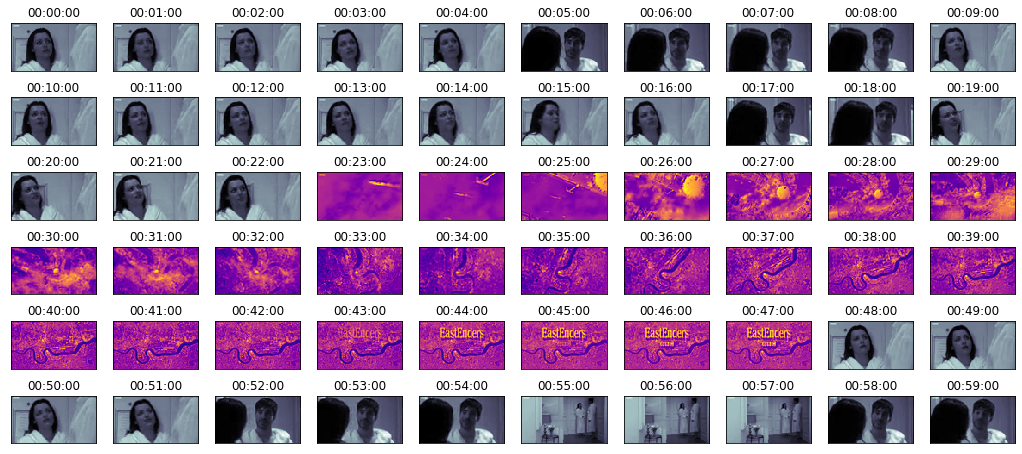

../data/mixed/m000byty.mp4


../data/mixed/m000cxhn.mp4


../data/mixed/m000c6qs.mp4


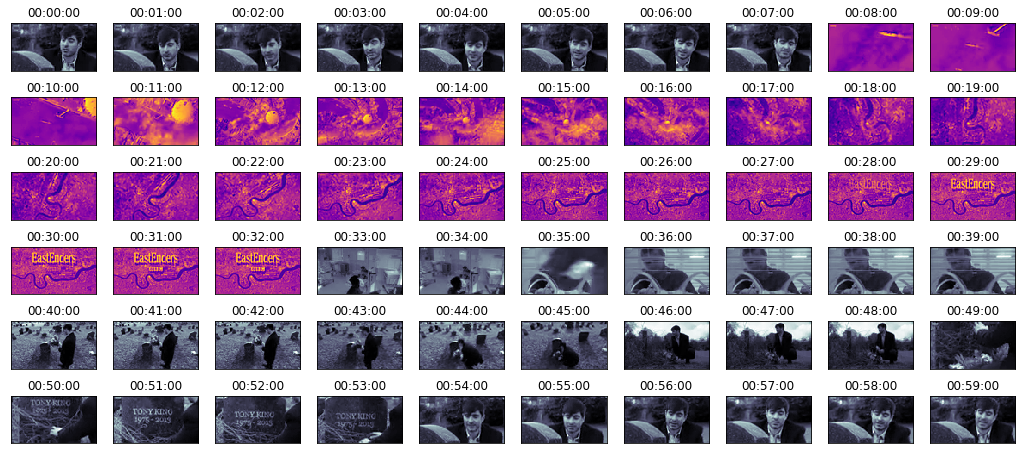

../data/mixed/m000bqkv.mp4


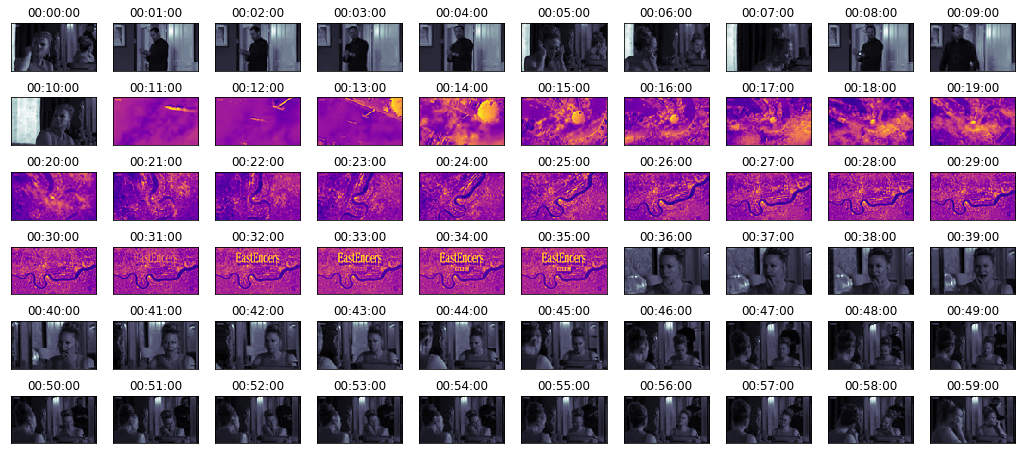

../data/mixed/m000c6jx.mp4


In [8]:
show_result('../data/mixed')

[[0.0, 35.0], [0.0, 35.0], [0.0, 35.0], [-0.04, 34.96], [0.0, 35.0]]
../data/doctor/b0bpvw9q.mp4


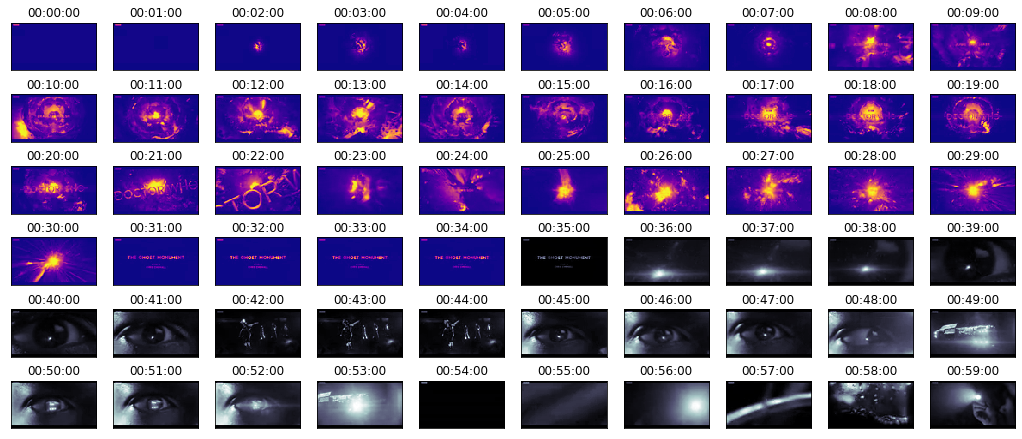

../data/doctor/b0brghbp.mp4


../data/doctor/b0bpwhxl.mp4


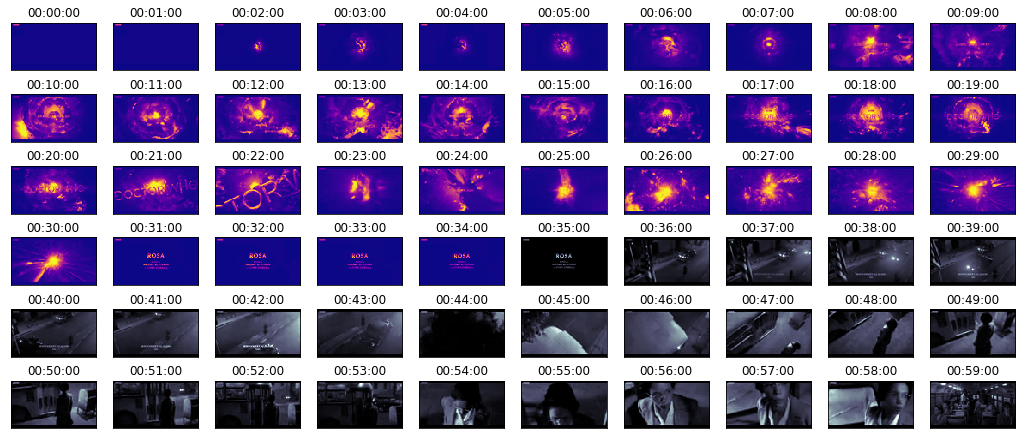

../data/doctor/b0br9np4.mp4


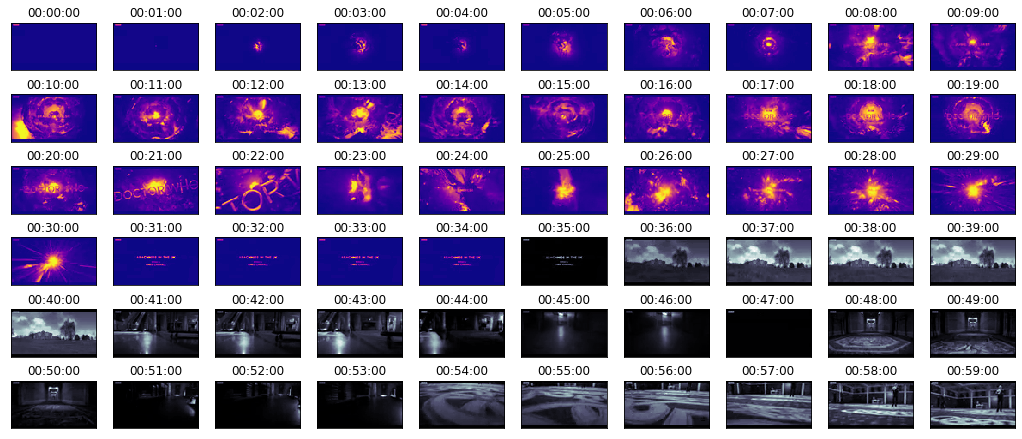

../data/doctor/p06rg5lg.mp4


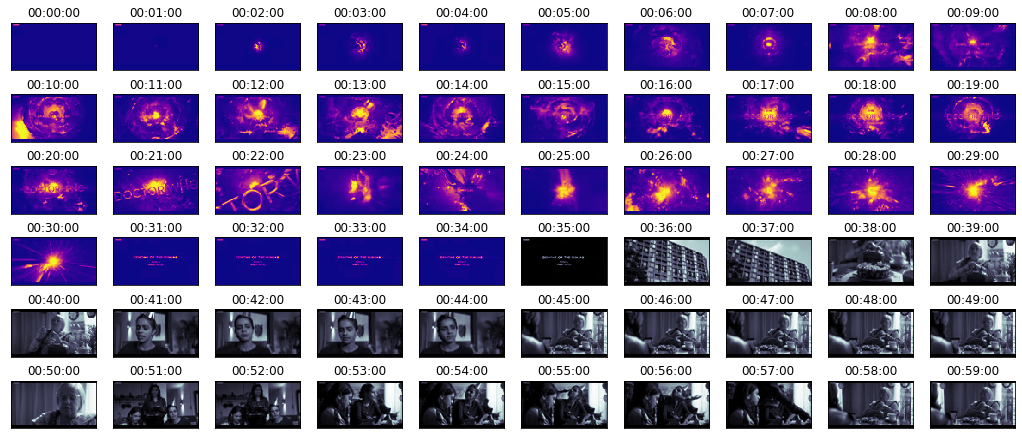

In [10]:
show_result('../data/doctor')

In [ ]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt

def show_gif(episode, intro=None, colors=['bone', 'plasma']):
    fps = 25
    if intro:
        start_frame = int(intro['start'] * fps)
        end_frame = int(intro['end'] * fps)
        classes = set(range(start_frame, end_frame))
    else:
        classes = set()
    num_imgs = len(episode) // fps
    columns = 10
    rows = num_imgs // columns + 1
    fig = plt.figure()
    
    images = []
    for i in range(columns*rows):
        if i * fps >= len(episode):
            continue
        img = plt.imshow(episode[i*fps], cmap=colors[int(i*fps in classes)], animated=True)
        images.append([img])
    
    ani = animation.ArtistAnimation(fig, images, interval=500, blit=True, repeat_delay=1000)
    
    ani.save("movie.mp4")
    
    plt.show()

In [ ]:
show_gif(episodes[0], {'start': intros[0][0], 'end': intros[0][1]})